In [2]:
%matplotlib inline
import pandas as pd 
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt

In [3]:
tracks = pd.read_csv('../../data/raw/music_tracks.csv', dtype=object)
tracks.head()

,track_id,album_comments,album_date_created,album_date_released,album_engineer,album_favorites,album_id,album_information,album_listens,album_producer,...,track_information,track_interest,track_language_code,track_license,track_listens,track_lyricist,track_number,track_publisher,track_tags,track_title
0,2,0,2008-11-26 1:44,2009-01-05 0:00,NaN,4,1,<p></p>,6073,NaN,...,NaN,4656,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1293,NaN,3,NaN,[],Food
1,3,0,2008-11-26 1:44,2009-01-05 0:00,NaN,4,1,<p></p>,6073,NaN,...,NaN,1470,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,514,NaN,4,NaN,[],Electric Ave
2,5,0,2008-11-26 1:44,2009-01-05 0:00,NaN,4,1,<p></p>,6073,NaN,...,NaN,1933,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1151,NaN,6,NaN,[],This World
3,10,0,2008-11-26 1:45,2008-02-06 0:00,NaN,4,6,NaN,47632,NaN,...,NaN,54881,en,Attribution-NonCommercial-NoDerivatives (aka M...,50135,NaN,1,NaN,[],Freeway
4,20,0,2008-11-26 1:45,2009-01-06 0:00,NaN,2,4,"<p> ""spiritual songs"" from Nicky Cook</p>",2710,NaN,...,NaN,978,en,Attribution-NonCommercial-NoDerivatives (aka M...,361,NaN,3,NaN,[],Spiritual Level


In [4]:
# Remove non necessary columns

del tracks['album_comments']
del tracks['album_engineer']
del tracks['album_information']
del tracks['album_producer']
del tracks['track_publisher']
del tracks['track_tags']
del tracks['track_lyricist']
del tracks['track_license']
del tracks['track_composer']
del tracks['track_information']

In [5]:
tracks.head()

,track_id,album_date_created,album_date_released,album_favorites,album_id,album_listens,album_tags,album_title,album_tracks,album_type,...,track_duration,track_favorites,track_genre_top,track_genres,track_genres_all,track_interest,track_language_code,track_listens,track_number,track_title
0,2,2008-11-26 1:44,2009-01-05 0:00,4,1,6073,[],AWOL - A Way Of Life,7,Album,...,168,2,Hip-Hop,[21],[21],4656,en,1293,3,Food
1,3,2008-11-26 1:44,2009-01-05 0:00,4,1,6073,[],AWOL - A Way Of Life,7,Album,...,237,1,Hip-Hop,[21],[21],1470,en,514,4,Electric Ave
2,5,2008-11-26 1:44,2009-01-05 0:00,4,1,6073,[],AWOL - A Way Of Life,7,Album,...,206,6,Hip-Hop,[21],[21],1933,en,1151,6,This World
3,10,2008-11-26 1:45,2008-02-06 0:00,4,6,47632,[],Constant Hitmaker,2,Album,...,161,178,Pop,[10],[10],54881,en,50135,1,Freeway
4,20,2008-11-26 1:45,2009-01-06 0:00,2,4,2710,[],Niris,13,Album,...,311,0,NaN,"[76, 103]","[17, 10, 76, 103]",978,en,361,3,Spiritual Level


In [5]:
#cleanup tracks.csv , remove non-related rows
# remove rows with track_id null or non-numeric values

tracks['track_id'] = pd.to_numeric(tracks.track_id.astype(str), errors='coerce')

tracks=tracks.drop(tracks[pd.isna(tracks['track_id'])].index)

# convert track_id back to integer
tracks['track_id'] = tracks['track_id'].astype(int)


In [6]:
#properly format track_date_created column to date format
# replace empty track_date_created fields with the value of album_created_date

tracks['track_date_created'] = pd.to_datetime(tracks['track_date_created'], format='%Y-%m-%d %H:%M', errors='coerce')

tracks['track_date_created'] = np.where(pd.isna(tracks['track_date_created']),tracks['album_date_created'],tracks['track_date_created'])

# remove rows with null track_date_created 
tracks=tracks.drop(tracks[pd.isna(tracks['track_date_created'])].index)

# verify if any row exist with empty track_date-created
tracks[pd.isna(tracks['track_date_created'])]


,track_id,album_date_created,album_date_released,album_favorites,album_id,album_listens,album_tags,album_title,album_tracks,album_type,...,track_duration,track_favorites,track_genre_top,track_genres,track_genres_all,track_interest,track_language_code,track_listens,track_number,track_title


In [7]:
# remove rows with null track_interest 
tracks=tracks.drop(tracks[pd.isna(tracks['track_interest'])].index)

# verify if any row exist with empty track_date-created
tracks[pd.isna(tracks['track_interest'])]


,track_id,album_date_created,album_date_released,album_favorites,album_id,album_listens,album_tags,album_title,album_tracks,album_type,...,track_duration,track_favorites,track_genre_top,track_genres,track_genres_all,track_interest,track_language_code,track_listens,track_number,track_title


# Feature Engineering

In [8]:
#extract year from track_date_created

tracks['track_year_created'] = pd.to_datetime(tracks['track_date_created']).dt.year

tracks['track_year_created'].head()

0    2008
1    2008
2    2008
3    2008
4    2008
Name: track_year_created, dtype: int64

In [10]:
tracks['track_bit_rate'] = pd.to_numeric(tracks['track_bit_rate'])

# remove rows with track_bit_rate < 24000 - very poor quality 
tracks=tracks.drop(tracks[tracks['track_bit_rate']<24000].index)

max_bit_rate = int(tracks['track_bit_rate'].max())
max_bit_rate

448000

In [11]:
#calculate track quality coefficient
# 1:  (bit rate factor > 0.7) 
# 0.7: between 0.5 and 0.7 
# 0.5: between 0.4 and 0.5 
# 0.4: less than 0.4 
tracks['bit_rate_factor'] = np.round(tracks['track_bit_rate']/max_bit_rate, decimals=2)
tracks['bit_rate_factor']

0         0.57
1         0.57
2         0.57
3         0.43
4         0.57
5         0.57
6         0.57
7         0.57
8         0.57
9         0.57
10        0.57
11        0.57
12        0.57
13        0.57
14        0.29
15        0.29
16        0.29
17        0.29
18        0.57
19        0.57
20        0.57
21        0.57
22        0.57
23        0.64
24        0.63
25        0.43
26        0.43
27        0.57
28        0.57
29        0.43
          ... 
137723    0.71
137724    0.71
137725    0.71
137726    0.71
137727    0.71
137728    0.71
137729    0.71
137730    0.71
137731    0.71
137732    0.71
137733    0.71
137734    0.71
137735    0.71
137736    0.71
137737    0.71
137738    0.71
137739    0.71
137740    0.71
137741    0.71
137742    0.71
137743    0.71
137744    0.71
137745    0.71
137746    0.71
137747    0.71
137748    0.71
137749    0.71
137750    0.71
137751    0.71
137752    0.71
Name: bit_rate_factor, Length: 105899, dtype: float64

In [12]:
# categorize bit_rate_factor to four divisions
# 1:  (bit rate factor > 0.7) 
# 0.7: between 0.5 and 0.7 
# 0.5: between 0.4 and 0.5 
# 0.4: less than 0.4 
tracks['bit_rate_factor'] = tracks['bit_rate_factor'].apply(lambda x: 1 if x >= 0.7 else 0.7 if 0.5 <= x < 0.7 else 0.5 if 0.4 <= x < 0.5 else 0.4)
tracks['bit_rate_factor'].head()

0    0.7
1    0.7
2    0.7
3    0.5
4    0.7
Name: bit_rate_factor, dtype: float64

In [9]:
tracks['track_listens'] = pd.to_numeric(tracks['track_listens'])

# convert track_interest back to integer
tracks['track_listens'] = tracks['track_listens'].astype(int)

tracks['track_listens'].describe()

count    106018.000000
mean       2339.101747
std        8047.742902
min           0.000000
25%         294.000000
50%         769.000000
75%        2027.000000
max      543252.000000
Name: track_listens, dtype: float64

In [10]:
# categorize track_listens to five divisions
# 1:  (Track Listens >= 2000) 
# 2: between 1000 and 2000 
# 3: between 500 and 1000 
# 4: between 250 and 500 
# 5: less than 500
tracks['listens_factor'] = tracks['track_listens'].apply(lambda x: 1 if x >= 2000 else 2 if 1000 <= x < 2000 else 3 if 500 <= x < 1000 else 4 if 250 <= x < 500 else 5)
tracks['listens_factor'].head()

0    2
1    3
2    2
3    1
4    4
Name: listens_factor, dtype: int64

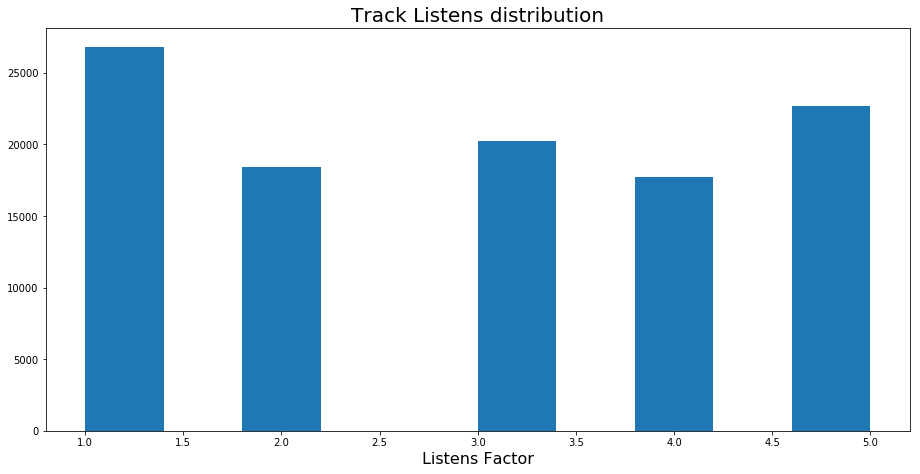

In [15]:
fig = plt.figure(figsize=(15,7))

axes = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # left, bottom, width, height (range 0 to 1)

axes.hist(tracks['listens_factor'])

axes.set_xlabel('Listens Factor', fontsize=16)

axes.ticklabel_format(useOffset = True)
axes.set_title('Track Listens distribution', fontsize=20);

In [11]:
tracks['track_interest'] = pd.to_numeric(tracks['track_interest'])
max_interest_rate = int(tracks['track_interest'].max())

# convert track_interest back to integer
tracks['track_interest'] = tracks['track_interest'].astype(int)

tracks['track_interest'].head()

0     4656
1     1470
2     1933
3    54881
4      978
Name: track_interest, dtype: int64

In [12]:
max_interest_rate = int(tracks['track_interest'].max())
max_interest_rate

3293557

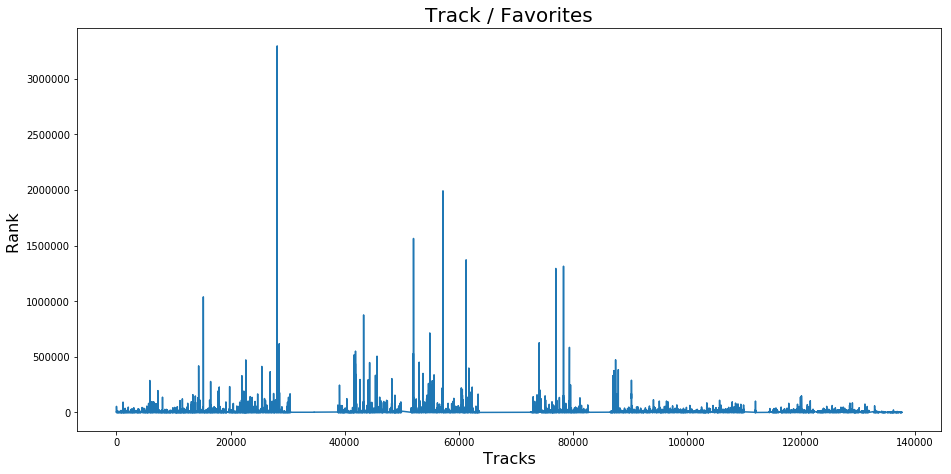

In [13]:
fig = plt.figure(figsize=(15,7))

axes = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # left, bottom, width, height (range 0 to 1)

axes.plot(tracks['track_interest'])

axes.set_xlabel('Tracks', fontsize=16)
axes.set_ylabel('Rank ', fontsize=16)
axes.ticklabel_format(useOffset = True)
axes.set_title('Track / Favorites', fontsize=20);

In [14]:
#calculate interest coefficient
# 1:  Top Chart (Interest factor > 0.09) x =1 - more than 290,000 interests
# 0.8: between 230,000 and 290,000 
# 0.7: between 165,000 and 230,000 
# 0.6: between 98,000 and 165,000 
# 0.5: between 65,000 and 98,000 
# 0.3: between 30,000 and 65,000 
# 0.2: below 30,000 would be low interest 

tracks['interest_factor'] = np.round(tracks['track_interest'] / max_interest_rate , decimals = 4) * 100

tracks['interest_factor'] = tracks['interest_factor'].apply(lambda x: 1 if x >= 0.09 else 0.8 if 0.07 <= x < 0.09 else 0.7 if 0.05 <= x < 0.07 else 0.6 if 0.03 <= x < 0.02 else 0.5 if 0.02 <= x < 0.03 else 0.3 if 0.01<= x <= 0.02  else 0.2 if 0.001<= x <= 0.01 else 0.1)

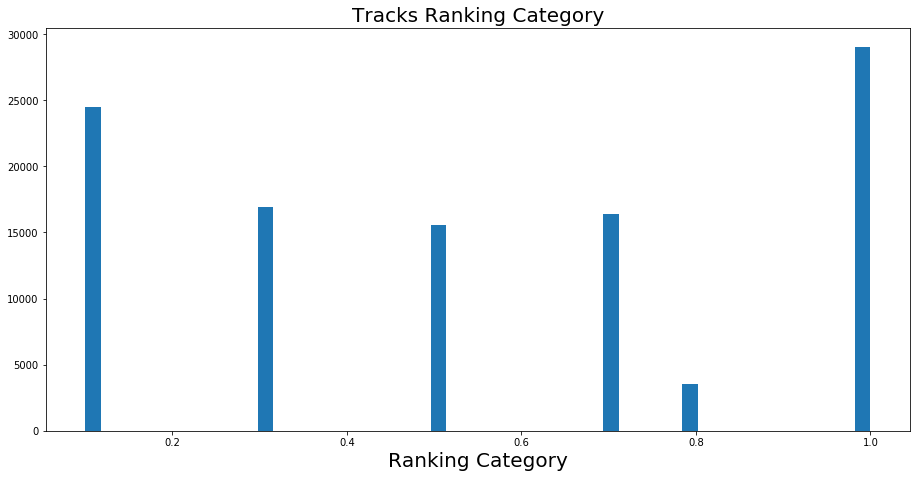

In [20]:
fig = plt.figure(figsize=(15,7))

axes = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # left, bottom, width, height (range 0 to 1)

axes.hist(tracks['interest_factor'], bins=50)

axes.set_xlabel('Ranking Category', fontsize=20)
axes.set_title('Tracks Ranking Category', fontsize=20);

In [21]:
#consider base price = $4.99
# calculate track price based on interest_factor and bit_rate_factor

higher_track_price = 4.99
tracks['track_price'] = np.round(higher_track_price * tracks['bit_rate_factor']*tracks['interest_factor'], decimals=2)
tracks['track_price'].head()

0    3.49
1    0.35
2    2.45
3    2.50
4    0.35
Name: track_price, dtype: float64

In [22]:
#calculate average of interest rank by artist
#average_interest_by_artist = pd.to_numeric(np.round(tracks['track_interest'].groupby(tracks['artist_name']).mean(), decimals=0), downcast='integer')
average_interest_by_artist = pd.to_numeric(np.round(tracks['track_interest'].groupby(tracks['artist_name']).mean(), decimals=0), downcast='integer')
average_interest_by_artist

artist_name
"Blue" Gene Tyranny                     13764
"V"                                      3823
#CCmixtape                              20236
#NAME?                                   1526
$50 Trumpet                              2228
'Gene Green                              5879
( Early ) Salomè Lego Playset             452
((( vlubä )))                             933
((Bohrer))                               3351
(-)                                       568
(F.E.V.E.R.)                            11573
(a is to b)                              3176
(c)(P)ee                                 7576
(dj) morsanek                            4927
(morse)                                  2665
(none given)                             5080
(o)thers                                   69
+                                        1085
+DOG+                                    1014
+HIRS+                                    942
-                                        1267
-1348-                

In [24]:
#calculate average of interest rank by genre
pd.to_numeric(np.round(tracks['track_interest'].groupby(tracks['track_genres']).mean()), downcast='integer')

track_genres
[1, 10, 111]                                    1033
[1, 10, 12]                                     4475
[1, 10, 15, 38, 76]                             2615
[1, 10, 17, 49, 76]                             1385
[1, 10, 38, 76]                                  871
[1, 101]                                        4298
[1, 103]                                         698
[1, 107, 125]                                   2476
[1, 107, 236]                                   4588
[1, 107, 247, 514]                              2137
[1, 107]                                         658
[1, 10]                                          207
[1, 111]                                        1847
[1, 12, 17, 18, 38, 41, 94, 107, 137, 1235]     6993
[1, 12, 17, 38]                                 1227
[1, 12, 38, 98, 250]                            6333
[1, 12, 38]                                     3034
[1, 12, 71, 98]                                  792
[1, 1235]                        

In [25]:
#track_length = ['less than 5 minutes', 'between 5 and 7 minutes', 'above 7 minutes']

tracks['track_length'] = pd.to_numeric(tracks['track_duration']).apply(lambda x: 'less than 3 minutes' if x < 180 else 'between 3 and 5 minutes' if 180<= x < 300 else 'between 5 and 7 minutes' if 300 <= x < 420 else 'above 7 minutes')
tracks

,track_id,album_date_created,album_date_released,album_favorites,album_id,album_listens,album_tags,album_title,album_tracks,album_type,...,track_language_code,track_listens,track_number,track_title,track_year_created,bit_rate_factor,listens_factor,interest_factor,track_price,track_length
0,2,2008-11-26 1:44,2009-01-05 0:00,4,1,6073,[],AWOL - A Way Of Life,7,Album,...,en,1293,3,Food,2008,0.7,2,1.0,3.49,less than 3 minutes
1,3,2008-11-26 1:44,2009-01-05 0:00,4,1,6073,[],AWOL - A Way Of Life,7,Album,...,en,514,4,Electric Ave,2008,0.7,3,0.1,0.35,between 3 and 5 minutes
2,5,2008-11-26 1:44,2009-01-05 0:00,4,1,6073,[],AWOL - A Way Of Life,7,Album,...,en,1151,6,This World,2008,0.7,2,0.7,2.45,between 3 and 5 minutes
3,10,2008-11-26 1:45,2008-02-06 0:00,4,6,47632,[],Constant Hitmaker,2,Album,...,en,50135,1,Freeway,2008,0.5,1,1.0,2.50,less than 3 minutes
4,20,2008-11-26 1:45,2009-01-06 0:00,2,4,2710,[],Niris,13,Album,...,en,361,3,Spiritual Level,2008,0.7,4,0.1,0.35,between 5 and 7 minutes
5,26,2008-11-26 1:45,2009-01-06 0:00,2,4,2710,[],Niris,13,Album,...,en,193,4,Where is your Love?,2008,0.7,5,0.1,0.35,between 3 and 5 minutes
6,30,2008-11-26 1:45,2009-01-06 0:00,2,4,2710,[],Niris,13,Album,...,en,612,5,Too Happy,2008,0.7,3,0.5,1.75,less than 3 minutes
7,46,2008-11-26 1:45,2009-01-06 0:00,2,4,2710,[],Niris,13,Album,...,en,171,8,Yosemite,2008,0.7,5,0.3,1.05,less than 3 minutes
8,48,2008-11-26 1:45,2009-01-06 0:00,2,4,2710,[],Niris,13,Album,...,en,173,9,Light of Light,2008,0.7,5,0.3,1.05,between 3 and 5 minutes
9,134,2008-11-26 1:44,2009-01-05 0:00,4,1,6073,[],AWOL - A Way Of Life,7,Album,...,en,943,5,Street Music,2008,0.7,3,0.1,0.35,between 3 and 5 minutes


In [27]:
tracks.describe()

,track_id,track_bit_rate,track_interest,track_listens,track_year_created,bit_rate_factor,listens_factor,interest_factor,track_price
count,105899.000000,105899.000000,1.058990e+05,105899.000000,105899.000000,105899.000000,105899.000000,105899.000000,105899.000000
mean,79463.822331,263386.639628,3.554889e+03,2339.141626,2012.646559,0.892677,2.915334,0.553600,2.464082
std,44711.058308,67083.540173,1.907554e+04,8050.646864,2.519995,0.181636,1.484631,0.343882,1.637201
min,2.000000,24000.000000,2.000000e+00,0.000000,2008.000000,0.500000,1.000000,0.100000,0.250000
25%,40814.500000,192000.000000,6.035000e+02,294.000000,2010.000000,0.700000,1.000000,0.300000,1.050000
50%,78522.000000,293237.000000,1.320000e+03,768.000000,2013.000000,1.000000,3.000000,0.500000,2.500000
75%,119384.500000,320000.000000,3.071000e+03,2028.000000,2015.000000,1.000000,4.000000,1.000000,3.490000
max,155320.000000,448000.000000,3.293557e+06,543252.000000,2017.000000,1.000000,5.000000,1.000000,4.990000


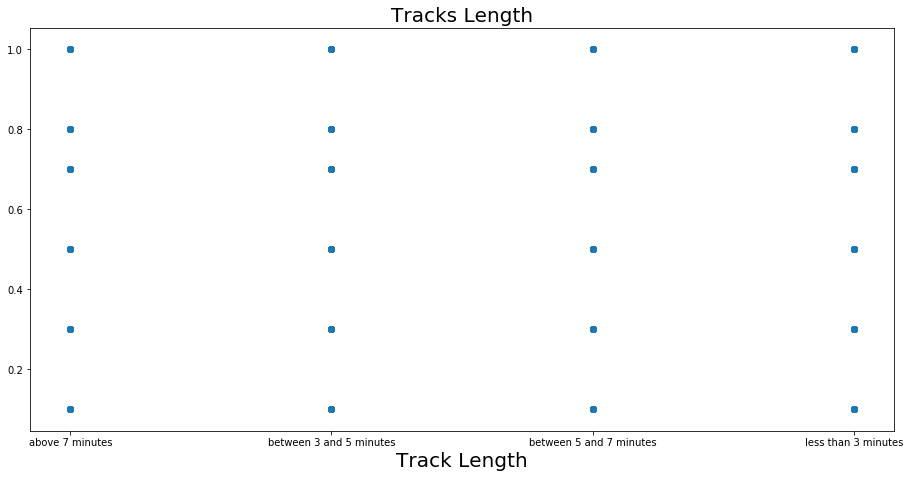

In [26]:
fig = plt.figure(figsize=(15,7))

axes = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # left, bottom, width, height (range 0 to 1)

axes.scatter(tracks['track_length'], tracks['interest_factor'])

axes.set_xlabel('Track Length', fontsize=20)
axes.set_title('Tracks Length', fontsize=20);


Text(0.5,1,'Track Listens Ranking')

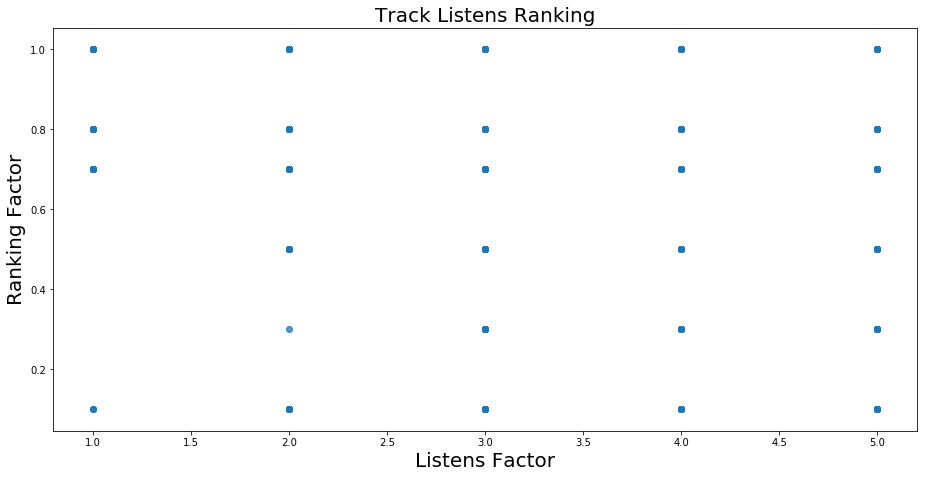

In [27]:
fig = plt.figure(figsize=(15,7))

axes = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # left, bottom, width, height (range 0 to 1)

axes.scatter(tracks['listens_factor'],tracks['interest_factor'], alpha = 0.5)

axes.set_xlabel('Listens Factor', fontsize=20)
axes.set_ylabel('Ranking Factor', fontsize=20)
axes.set_title('Track Listens Ranking', fontsize=20)


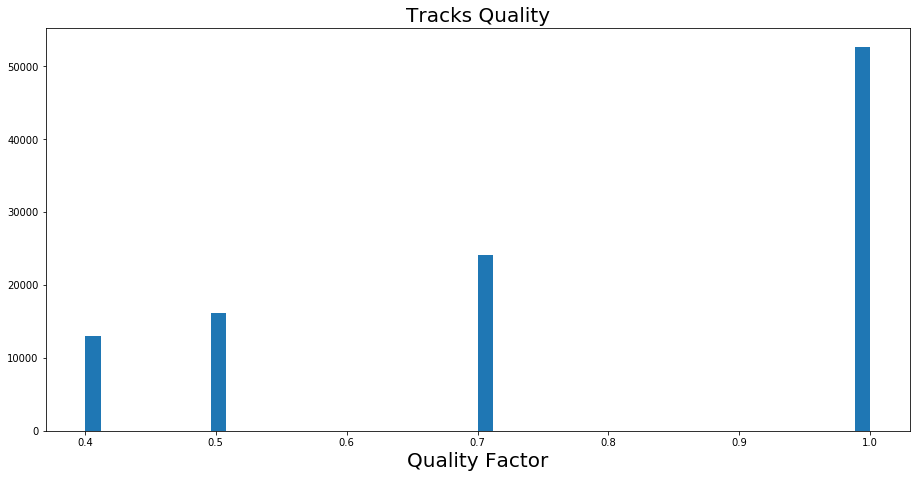

In [28]:
fig = plt.figure(figsize=(15,7))

axes = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # left, bottom, width, height (range 0 to 1)

axes.hist(tracks['bit_rate_factor'], bins=50)

axes.set_xlabel('Quality Factor', fontsize=20)
axes.set_title('Tracks Quality', fontsize=20);


Text(0.5,1,'Tracks Quality')

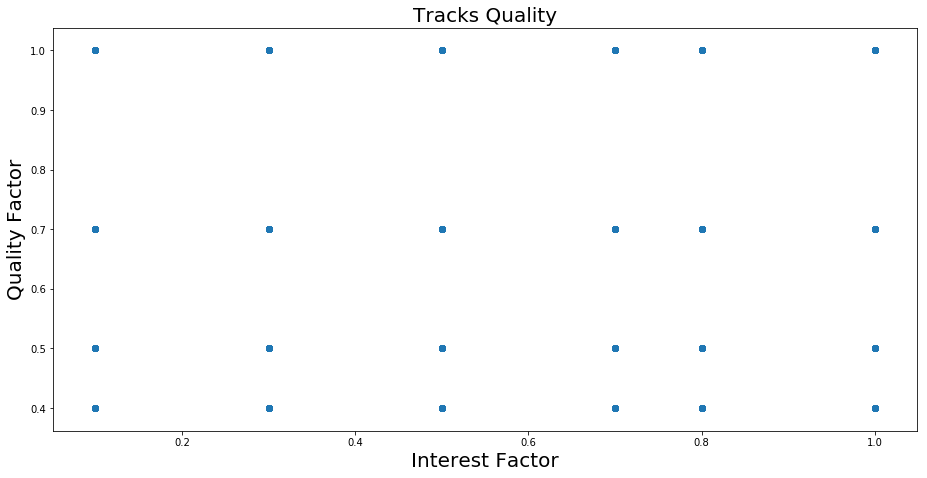

In [29]:
fig = plt.figure(figsize=(15,7))

axes = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # left, bottom, width, height (range 0 to 1)

axes.scatter(tracks['interest_factor'] , tracks['bit_rate_factor'])

axes.set_ylabel('Quality Factor', fontsize=20)
axes.set_xlabel('Interest Factor', fontsize=20)
axes.set_title('Tracks Quality', fontsize=20)

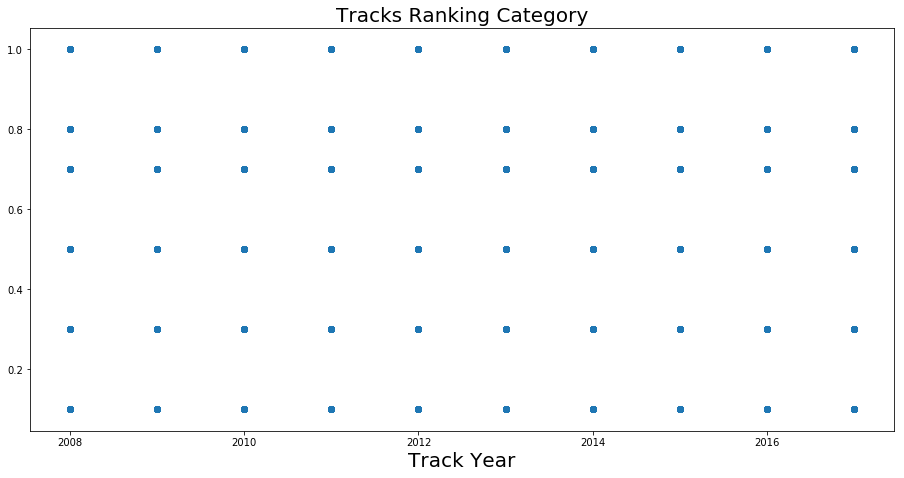

In [30]:
fig = plt.figure(figsize=(15,7))

axes = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # left, bottom, width, height (range 0 to 1)

axes.scatter(tracks['track_year_created'] , tracks['interest_factor'])

axes.set_xlabel('Track Year', fontsize=20)
axes.set_title('Tracks Ranking Category', fontsize=20);

In [31]:
# save the modified data frame to a new .CSV file to use in Model Training 

tracks.to_csv('../../data/processed/tracks_processed.csv', sep=',')
